In [50]:
import numpy as np
from matplotlib import pyplot as plt
from math import floor
from typing import Union
plt.style.use('dark_background')


Text(0, 0.5, 'Expected outcome')

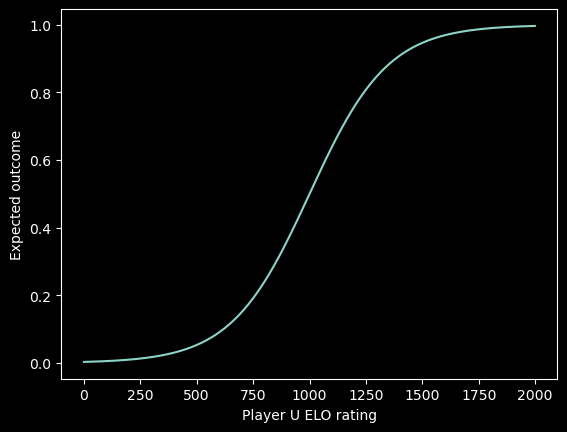

In [30]:
def expected_outcome(player_rating, opponent_rating, s_inv=1/400):
    return 1 / (1 + 10**((opponent_rating - player_rating) * s_inv))

x = np.arange(0,2000,1)
plt.plot(expected_outcome(x, 1000))
plt.xlabel("Player U ELO rating")
plt.ylabel("Expected outcome")
# plt.title("Expected outcome given opponent_rating is 1000")

In [28]:
print(expected_outcome(1600,1100),expected_outcome(1100,1600))

0.9090909090909091 0.09090909090909091


In [ ]:
if len

In [40]:
len(np.array(1).reshape(-1))

1

In [62]:
np.isin(np.random.rand(5),[0,1])

array([False, False, False, False, False])

In [53]:
def rating_gain(player_rating, opponent_rating, actual_outcome: Union[list, np.ndarray], b=5, k=64):
    """
    Calculates the change in player rating after a match based on their rating, 
    their opponent's rating, and the actual outcome of the match.

    Args:
        player_rating (float): The player's rating.
        opponent_rating (float): The opponent's rating.
        actual_outcome (list or array-like): A list or array-like object 
            containing the actual outcome(s) of the match. Each element of the 
            list or array should be either 1 (if the player won) or 0 
            (if the player lost). The length of this object should be 
            the number of matches played.
        b (int, optional): A constant used in the calculation. Defaults to 5.
        k (int, optional): A constant used in the calculation. Defaults to 64.

    Returns:
        float: The change in the player's rating after the match.

    Raises:
        ValueError: If the length of the `actual_outcome` object is not equal to 
        the number of matches played.

    Examples:
        >>> rating_gain(1500, 1400, [1, 0])
        -12.928319974769295

    """
    actual_outcome = np.array(actual_outcome).reshape(-1)
    assert np.isin(actual_outcome,[0,1]), "The actual outcomes are not all 0s and 1s!"
    n_match = len(actual_outcome)
    if n_match == 1:
        assert actual_outcome.item() in [0,1]
    
    actout_sum = actual_outcome.sum()
    expout_player = expected_outcome(player_rating, opponent_rating)
    return b*actout_sum + k*(actout_sum - n_match*expout_player)

plt.plot(rating_gain(x,1000,1))
plt.xlabel("Player U ELO ratings")
plt.ylabel("Rating gain")
    

AttributeError: 'bool' object has no attribute 'sum'

In [47]:
rating_gain(1500, 1400, [1, 0])

-12.928319974769295

In [46]:
expected_outcome(1500, 1400, s_inv=1/400)

0.6400649998028851

In [ ]:
def ratings_multigame(A_ratings, B_ratings, actual_outcome, s_inv = 1/400, k=64):
    new_arating = 